Format Data

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os
import itertools

# boolean to choose to run hepatitis vs diabetes
is_hepatitis = True

# empty dataframe, will be set to whichever dataset we're using
data_df = pd.DataFrame()

# FORMAT HEPATITIS DATA
if True: #is_hepatitis:
  if not os.path.isfile('./hepatitis.data'):
    !wget http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data

  names = [
         "Class", "AGE", "SEX", "STEROID", "ANTIVIRALS", "FATIGUE", "MALAISE", 
         "ANOREXIA", "LIVER BIG", "LIVER FIRM", "SPLEEN PALPABLE", "SPIDERS", 
         "ASCITES", "VARICES", "BILIRUBIN", "ALK PHOSPHATE", "SGOT", "ALBUMIN", 
         "PROTIME", "HISTOLOGY"
         ]

  hep_df = pd.read_csv("hepatitis.data", header=None, names=names)
  hep_df = hep_df[(hep_df.ne("?").all(1))].reset_index(drop=True)

  # convert data from str to numbers
  hep_df = hep_df.astype('float', errors='ignore')
  data_df = hep_df

# FORMAT DIABETES DATA
if True:
  if not os.path.isfile('./messidor_features.arff'):
    !wget https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff

  # from https://archive.ics.uci.edu/ml/datasets/Diabetic+Retinopathy+Debrecen+Data+Set
  # info:
  #   column 19: 1 = contains signs of DR, 0 = no signs of DR (diabteic retinopathy)
  dia_file = open("messidor_features.arff", 'r')
  dia_lines = dia_file.readlines()

  dia_df_list = []
  for line in dia_lines:
    line = line.strip("\n")
    if(line and line[0] != "@"):
      dia_df_row = line.split(',')
      dia_df_list.append(dia_df_row)
  names = [
         "pre-quality", "pre-screening", "MA1","MA2","MA3","MA4","MA5","MA6","Exudate1","Exudate2","Exudate3","Exudate4","Exudate5","Exudate6","Exudate7","Exudate8","MaculaDist","OpticDics","AMFM","Class"
         ]

  dia_df = pd.DataFrame(dia_df_list)
  dia_df = dia_df.astype('float', errors='ignore')
  dia_df.columns = names
  data_df = dia_df

print(data_df)

--2022-02-08 22:28:47--  http://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7545 (7.4K) [application/x-httpd-php]
Saving to: ‘hepatitis.data’

hepatitis.data      100%[===================>]   7.37K  --.-KB/s    in 0s      

2022-02-08 22:28:47 (229 MB/s) - ‘hepatitis.data’ saved [7545/7545]

--2022-02-08 22:28:47--  https://archive.ics.uci.edu/ml/machine-learning-databases/00329/messidor_features.arff
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 117224 (114K) [application/x-httpd-php]
Saving to: ‘messidor_features.arff’

messidor_features.a 100%[===================>] 114.48K  --

# Running Pearson correlation testing to identify relevant features

For Hepatitis Data

In [ ]:
hep_correlation = hep_df.corr()['Class']
correlated_features = []

#Correlation matrix of features with target output
print(hep_correlation)

#Remove features which have a correlation between -0.2 and 0.2 as they are insignificant
for index,row in hep_correlation.items():
      if abs(row) > 0.2: 
        correlated_features.append(index)
      
      

hep_df = hep_df[correlated_features]



Class              1.000000
AGE               -0.212769
SEX                0.175876
STEROID            0.123830
ANTIVIRALS        -0.108776
FATIGUE            0.181151
MALAISE            0.275595
ANOREXIA          -0.185042
LIVER BIG         -0.194030
LIVER FIRM         0.055978
SPLEEN PALPABLE    0.135643
SPIDERS            0.287839
ASCITES            0.479211
VARICES            0.345785
BILIRUBIN         -0.351557
ALK PHOSPHATE     -0.189360
SGOT               0.078731
ALBUMIN            0.477404
PROTIME            0.395386
HISTOLOGY         -0.456856
Name: Class, dtype: float64


In [ ]:
hepfeatures = list(hep_df)[1:]

In [ ]:
#Convert output to list 

hep_groundtruth = np.array(hep_df['Class'].tolist()).astype(int)


#Remove output from data frame and convert rows which only contain the values for the features to list
hep_feat = hep_df.drop(['Class'], axis=1)

hep_feat = np.array(hep_feat.values.tolist())



For Diabetes Data

In [ ]:
#print(dia_df.describe())
dia_correlation = dia_df.corr()['Class']
#print(dia_df)
correlated_features = []

#Correlation matrix of features with target output
print(dia_correlation)

#Remove features which have a correlation between -0.2 and 0.2 as they are insignificant
for index,row in dia_correlation.items():
      if abs(row) > 0.1: 
        correlated_features.append(index)
      
      

dia_df = dia_df[correlated_features]

pre-quality      0.062816
pre-screening   -0.076925
MA1              0.292603
MA2              0.266338
MA3              0.234691
MA4              0.197511
MA5              0.161631
MA6              0.127861
Exudate1         0.058015
Exudate2         0.000479
Exudate3         0.038281
Exudate4         0.104254
Exudate5         0.142273
Exudate6         0.151424
Exudate7         0.184772
Exudate8         0.177313
MaculaDist       0.008466
OpticDics       -0.030868
AMFM            -0.042144
Class            1.000000
Name: Class, dtype: float64


In [ ]:
diafeatures = list(dia_df)[:-1]

In [ ]:
#Convert output to list 

dia_groundtruth = np.array(dia_df['Class'].tolist()).astype(int)


#Remove output from data frame and convert rows which only contain the values for the features to list
dia_feat = dia_df.drop(['Class'], axis=1)

dia_feat = np.array(dia_feat.values.tolist())

Data Structure

In [ ]:
class Node:
  def __init__(self, data_indices, parent):
    self.data_indices = data_indices
    self.left = None
    self.right = None
    self.split_feature = None
    self.split_value = None
    if parent:
      self.depth = parent.depth + 1
      self.num_classes = parent.num_classes
      self.data = parent.data
      self.labels = parent.labels
      class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes)
      self.class_prob = class_prob / np.sum(class_prob)

Greedty splitting of a node

In [ ]:
def greedy_test(node, cost_fn):
  #initialize the best parameter values
  best_cost = np.inf
  best_feature, best_value = None, None
  num_instances, num_features = node.data.shape
  #sort the features to get the test value candidates by taking the average of consecutive sorted values
  data_sorted = np.sort(node.data[node.data_indices],axis=0)
  test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
  for f in range(num_features):
    #stores the data corresponding to the f-th feature
    data_f = node.data[node.data_indices, f]
    for test in test_candidates[:,f]:
      #Split the indices using the test value of f-th feature
      left_indices = node.data_indices[data_f <= test]
      right_indices = node.data_indices[data_f > test]
      #we can't have a split where a chold has zero element
      #if this is true over all the test feauters and their test values then the functio returns the best cost as infinity
      if len(left_indices) == 0 or len(right_indices) == 0:
        continue
      #compute the left and right cost based on the current split
      left_cost = cost_fn(node.labels[left_indices])
      right_cost = cost_fn(node.labels[right_indices])
      num_left, num_right = left_indices.shape[0], right_indices.shape[0]
      #get combined cost using the weifhted sum of left and right cost
      cost = (num_left * left_cost + num_right * right_cost) / num_instances
      #update only when a lower cost is encountered
      if cost < best_cost:
        best_cost = cost
        best_feature = f
        best_value = test
  return best_cost, best_feature, best_value

Cost functions

In [ ]:
#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
 
  class_probs = np.bincount(labels) / len(labels)
  
  return 1 - np.max(class_probs)

#computers entropy of the labels by computing the class probabilities
def cost_entropy(labels):
  class_probs = np.bincount(labels) / len(labels)
  class_probs = class_probs[class_probs > 0]  # this is so log function doesn't fail
  return - np.sum(class_probs * np.log(class_probs))

#computes the gini index cost
def cost_gini_index(labels):
  class_probs = np.bincount(labels) / len(labels)
  return 1 - np.sum(np.square(class_probs))

Decision tree

In [ ]:
class DecisionTree:
  def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
    self.max_depth = max_depth
    self.root = None
    self.cost_fn = cost_fn
    self.num_classes = num_classes
    self.min_leaf_instances = min_leaf_instances

  def fit(self, data, labels):
    pass

  def predict(self, data_test):
    pass

In [ ]:
def fit(self, data, labels):
  self.data = data
  self.labels = labels
  if self.num_classes is None:
    self.num_classes = np.max(labels) + 1
  #below are initilization of the root of the decision tree
  self.root = Node(np.arange(data.shape[0]), None)
  self.root.data = data
  self.root.labels = labels
  self.root.num_classes = self.num_classes
  self.root.depth = 0
  #to recursively build the rest of the tree
  self._fit_tree(self.root)
  return self

def _fit_tree(self, node):
  #This gives the condition for termination of the recursion resulting in a leaf node
  if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
    return
  #greedily select the best test by minimizing cost
  cost, split_feature, split_value = greedy_test(node, self.cost_fn)
  #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
  if np.isinf(cost):
    return
  #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
  test = node.data[node.data_indices, split_feature] <= split_value
  node.split_feature = split_feature
  node.split_value = split_value
  #store the split feature and the value of the node
  left = Node(node.data_indices[test], node)
  right = Node(node.data_indices[np.logical_not(test)], node)
  #recursively call to the _fit_tree()
  self._fit_tree(left)
  self._fit_tree(right)
  node.left = left
  node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree

def predict(self, data_test):
  class_probs = np.zeros((data_test.shape[0], self.num_classes))
  for n, x in enumerate(data_test):
    node = self.root
    #loop along the depth of the tree looking region where the present data sample falls in based on the split feature and value
    while node.left:
      if x[node.split_feature] <= node.split_value:
        node = node.left
      else:
        node = node.right
    #the loop terminates when you reach a leaf of the tree and the class probabilitiy of that node is taken for prediction
    class_probs[n,:] = node.class_prob
  return class_probs

DecisionTree.predict = predict

# Experiments

Running k-fold cross-validation 

In [ ]:
costfns = [cost_misclassification,cost_entropy,cost_gini_index]

In [ ]:
#code for confusion matrix 
def confusion(y_pred, y_truth):
  

##Hepatitis

###Simple Execution no cross validation

accuracy is 80.0.


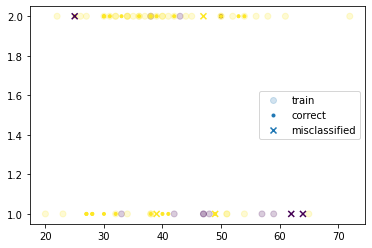

[[23  3]
 [ 3  1]]
30


In [ ]:
(num_instances, num_features), num_classes = hep_feat.shape, np.max(hep_groundtruth) + 1
inds = np.random.permutation(num_instances)

#print(num_instances)
x, y = hep_feat.astype(float), hep_groundtruth

#train-test split
x_train, y_train = x[inds[:50]], y[inds[:50]]
x_test, y_test = x[inds[50:]], y[inds[50:]]
#print(x_train)
tree = DecisionTree(max_depth=20)
probs_test = tree.fit(x_train, y_train).predict(x_test)

y_pred = np.argmax(probs_test,1)

accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')

#visualization
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_pred[incorrect], label='misclassified')
plt.legend()
(num_instances, num_features), num_classes = hep_feat.shape, np.max(hep_groundtruth) + 1
inds = np.random.permutation(num_instances)

#print(num_instances)
x, y = hep_feat.astype(float), hep_groundtruth

#train-test split

plt.show()

#Confusion Matrix
y_pred_CV = y_pred
y_test_CV = y_test

tp, tn, fp, fn = 0, 0, 0, 0
for i in range(len(y_pred_CV)):
  if(y_pred_CV[i] == 2 and y_test_CV[i] == 2):
    tp += 1
  elif(y_pred_CV[i] == 1 and y_test_CV[i] == 1):
    tn += 1
  elif(y_pred_CV[i] == 1 and y_test_CV[i] == 2):
    fp += 1
  elif(y_pred_CV[i] == 2 and y_test_CV[i] == 1):
    fn += 1
  else:
    pass

confusion_matrix = np.array([
                             [tp, fn],
                             [fp, tn]
                            ])
print(confusion_matrix)
print(np.sum(confusion_matrix))

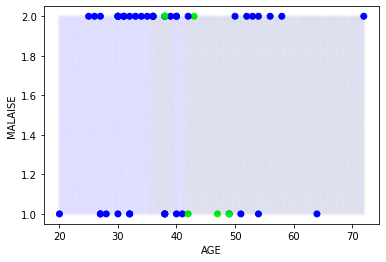

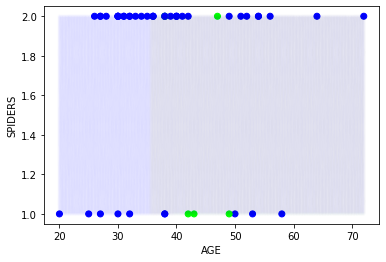

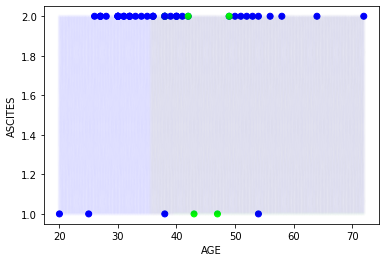

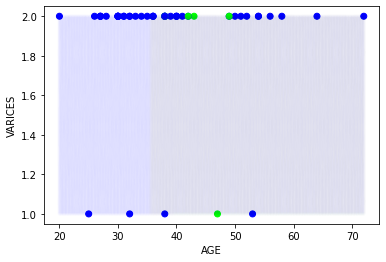

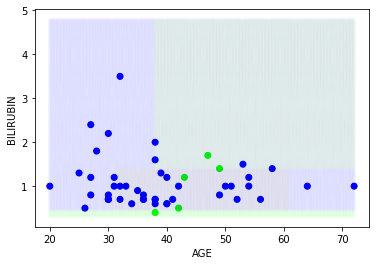

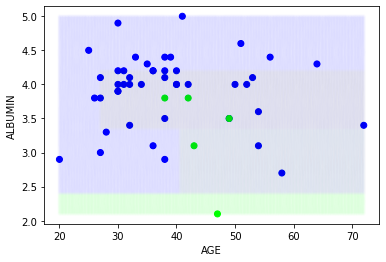

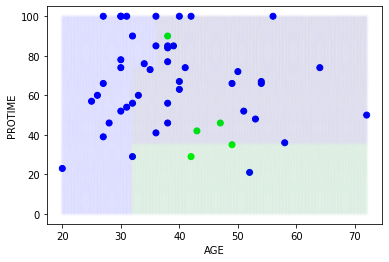

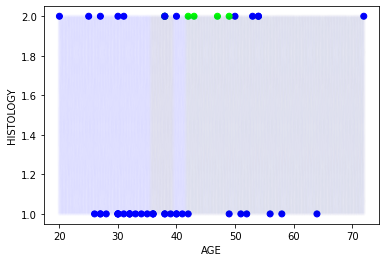

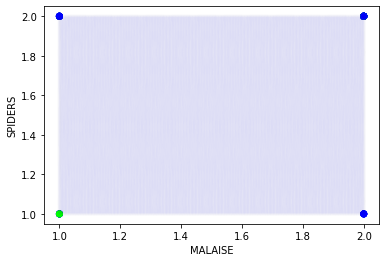

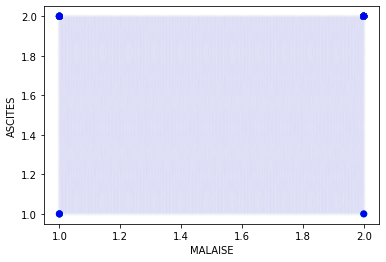

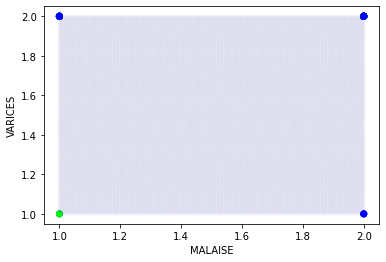

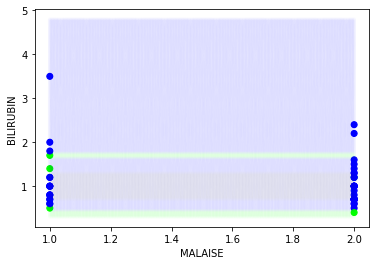

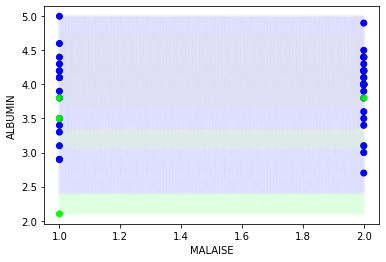

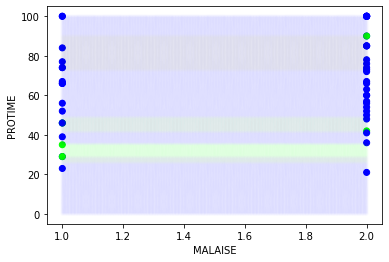

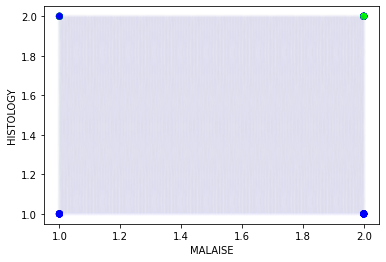

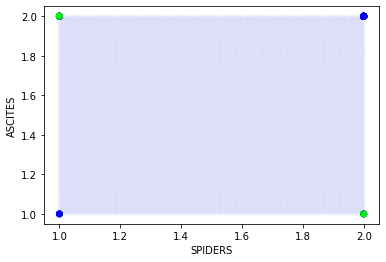

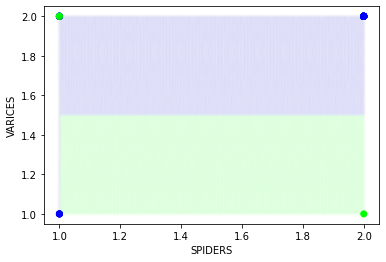

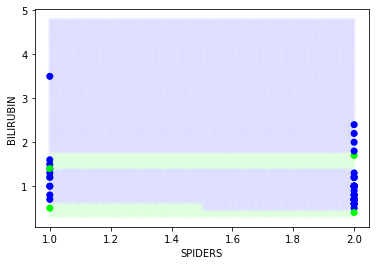

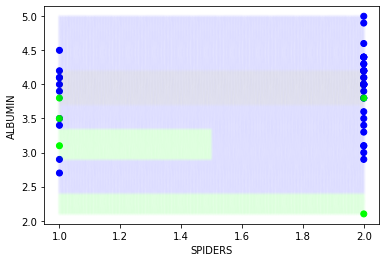

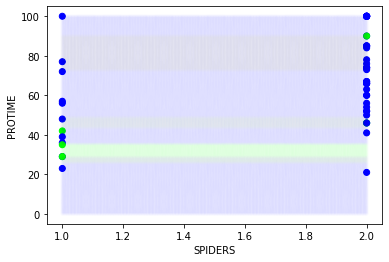

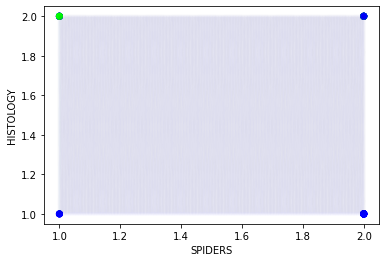

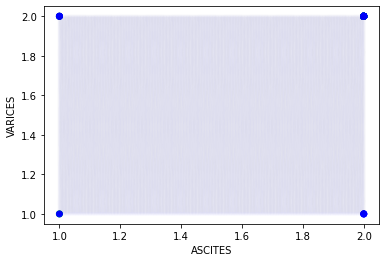

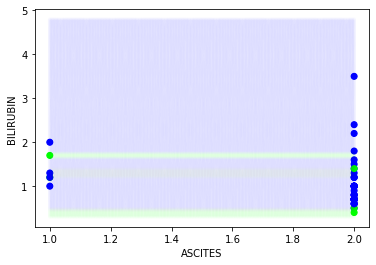

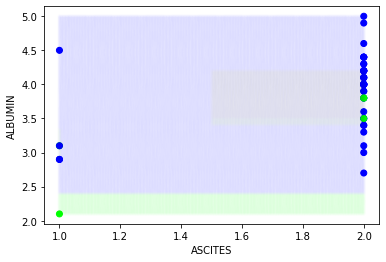

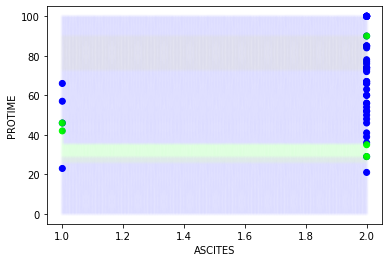

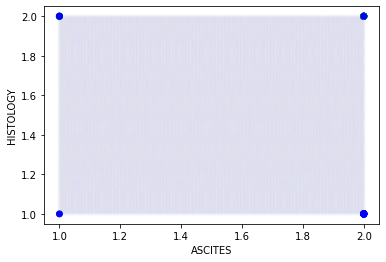

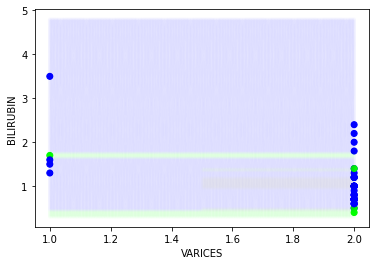

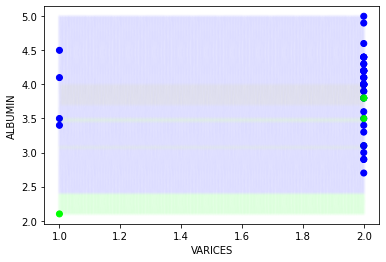

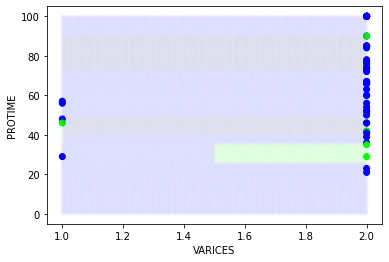

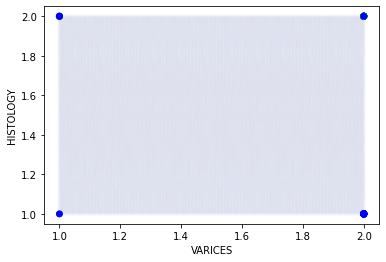

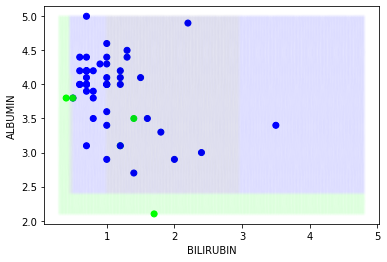

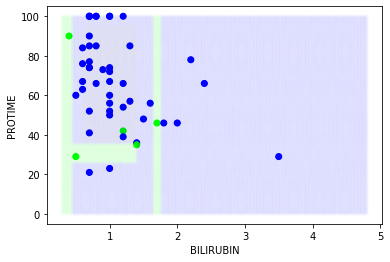

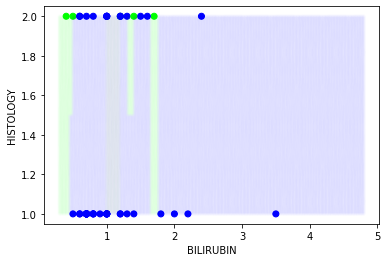

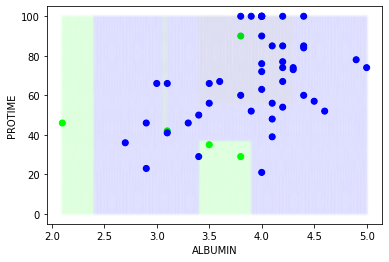

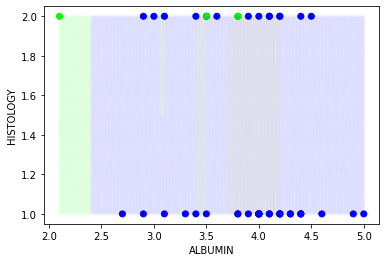

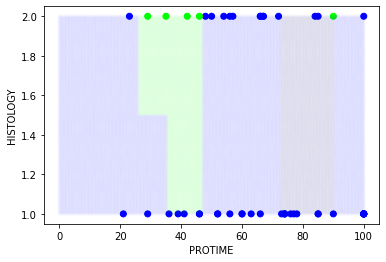

In [ ]:

(num_instances, num_features), num_classes = hep_feat.shape, np.max(hep_groundtruth) + 1
combolist = [*range(num_features)]
combolist = list(itertools.combinations(combolist, 2))

inds = np.random.permutation(num_instances)

#print(num_instances)
for combo in combolist:
  f1, f2 = combo
  x, y = hep_feat.astype(float)[:,[f1,f2]], hep_groundtruth

  #train-test split
  x_train, y_train = x[inds[:50]], y[inds[:50]]
  x_test, y_test = x[inds[50:]], y[inds[50:]]

  x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
  x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
  x0,x1 = np.meshgrid(x0v, x1v)
  x_all = np.vstack((x0.ravel(),x1.ravel())).T


  model = DecisionTree(max_depth=6)
  y_train_prob = np.zeros((y_train.shape[0], num_classes))
  y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
  y_prob_all = model.fit(x_train, y_train).predict(x_all)
  plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob, marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all, marker='.', alpha=.01)
  plt.ylabel(hepfeatures[f2])
  plt.xlabel(hepfeatures[f1])
  plt.show()

###Testing Depth

In [ ]:
(num_instances, num_features), num_classes = hep_feat.shape, np.max(hep_groundtruth) + 1
inds = np.random.permutation(num_instances)


hep_feat,hep_groundtruth =  hep_feat[inds], hep_groundtruth[inds]

folds = 10
hep_featurefolds = np.array_split(hep_feat, folds)
hep_truthfolds = np.array_split(hep_groundtruth, folds)
indexlist = [*range(folds)]

results = []
for depth in range(1,21):
  accuracies = [] 
  for i in range(folds):
    

    hep_testfold_features = hep_featurefolds[i]
    hep_testfold_truth = hep_truthfolds[i]

    indexes = indexlist.copy()
    del indexes[i]

    hep_trainfold_features = []
    hep_trainfold_truth = [] 
    for index in indexes:
      hep_trainfold_features.append(hep_featurefolds[index])
      hep_trainfold_truth.append(hep_truthfolds[index])
    
    hep_trainfold_features = np.concatenate(hep_trainfold_features)
    hep_trainfold_truth = np.concatenate(hep_trainfold_truth)
  
    x_train, y_train = hep_trainfold_features,hep_trainfold_truth
    x_test, y_test = hep_testfold_features, hep_testfold_truth

  


    tree = DecisionTree(max_depth=depth)
    probs_test = tree.fit(x_train, y_train).predict(x_test)

    y_pred = np.argmax(probs_test,1)


    accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
    accuracies.append(accuracy)
    print("For trial", i +1  ,f'the accuracy is {accuracy*100:.1f}.')

    #visualization
    correct = y_test == y_pred
    incorrect = np.logical_not(correct)
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
    plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
    plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_pred[incorrect], label='misclassified')
    plt.legend()
    plt.show()
  avg_accuracy = sum(accuracies)/len(accuracies)
  
  results.append(avg_accuracy)

  print("The average accuracy using the depth",depth , "is:", avg_accuracy)

d = 0
for result in results:
  d += 1
  print("At depth", d ,", the average accuracy is:", result)


Output hidden; open in https://colab.research.google.com to view.

###Testing Cost Functions

For trial 1 the accuracy is 100.0.


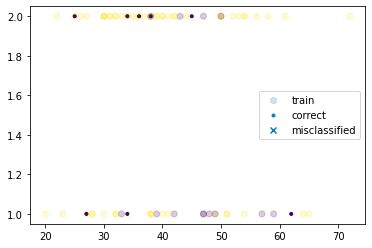

For trial 2 the accuracy is 100.0.


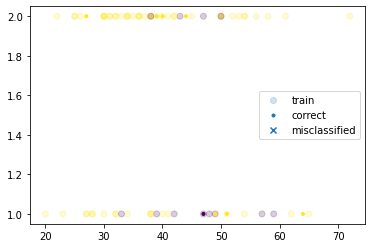

For trial 3 the accuracy is 87.5.


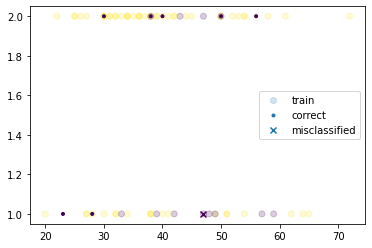

For trial 4 the accuracy is 37.5.


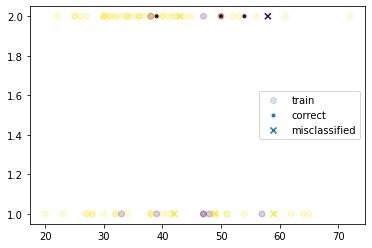

For trial 5 the accuracy is 75.0.


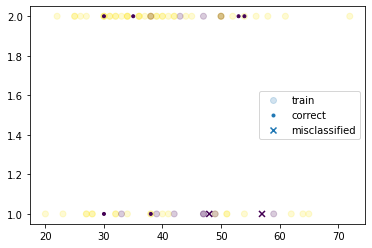

For trial 6 the accuracy is 100.0.


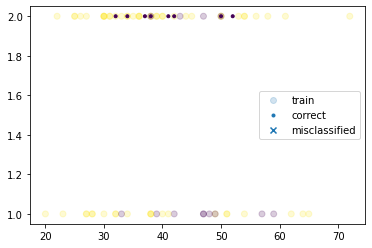

For trial 7 the accuracy is 62.5.


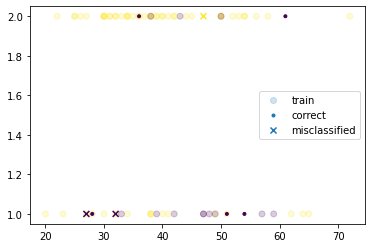

For trial 8 the accuracy is 62.5.


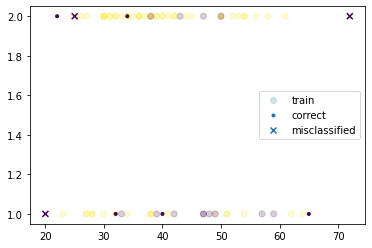

For trial 9 the accuracy is 75.0.


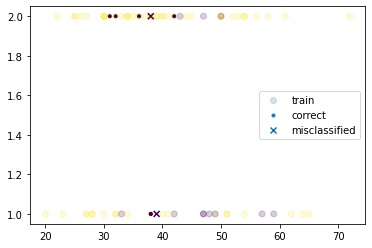

For trial 10 the accuracy is 87.5.


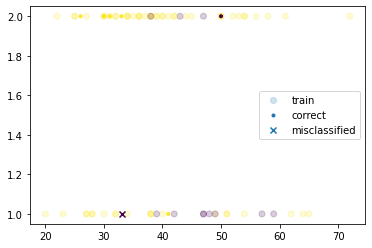

The average accuracy using the cost function cost_misclassification is: 0.7875
For trial 1 the accuracy is 100.0.


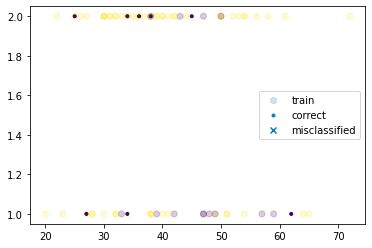

For trial 2 the accuracy is 100.0.


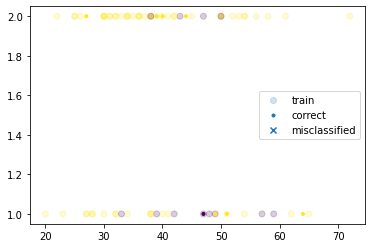

For trial 3 the accuracy is 75.0.


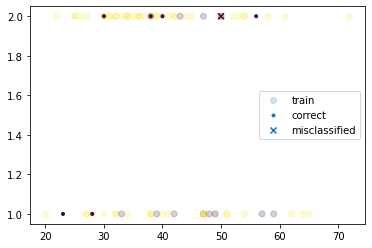

For trial 4 the accuracy is 37.5.


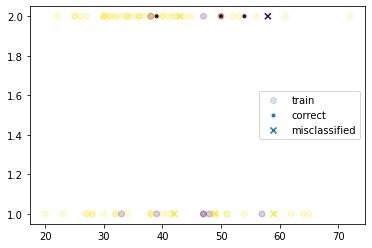

For trial 5 the accuracy is 87.5.


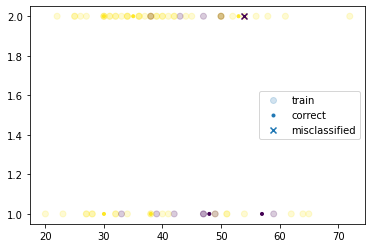

For trial 6 the accuracy is 100.0.


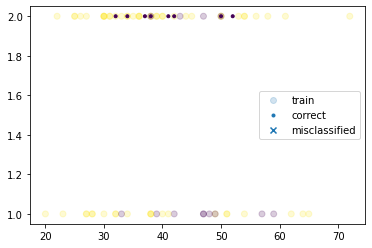

For trial 7 the accuracy is 75.0.


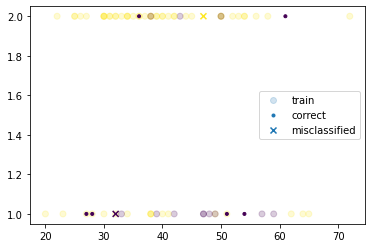

For trial 8 the accuracy is 75.0.


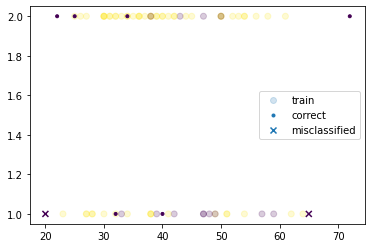

For trial 9 the accuracy is 75.0.


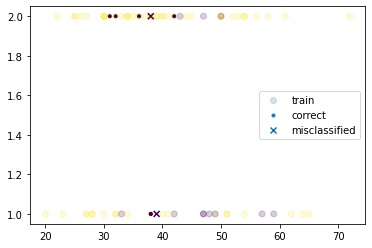

For trial 10 the accuracy is 75.0.


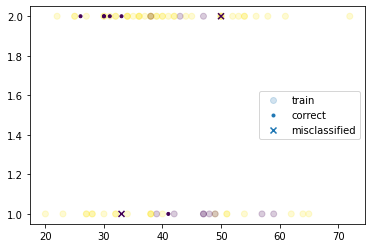

The average accuracy using the cost function cost_entropy is: 0.8
For trial 1 the accuracy is 87.5.


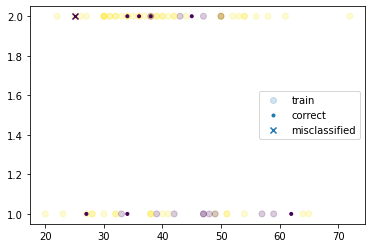

For trial 2 the accuracy is 100.0.


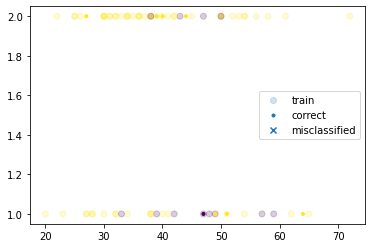

For trial 3 the accuracy is 75.0.


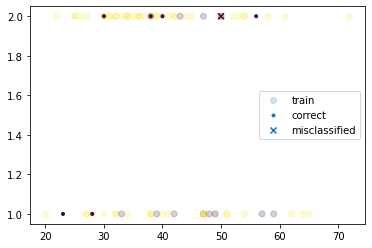

For trial 4 the accuracy is 37.5.


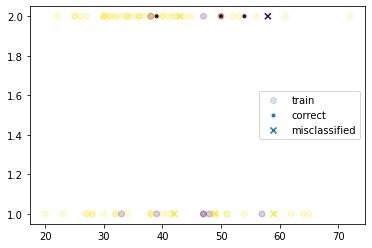

For trial 5 the accuracy is 87.5.


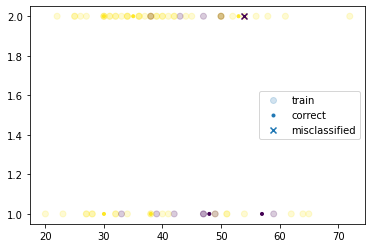

For trial 6 the accuracy is 100.0.


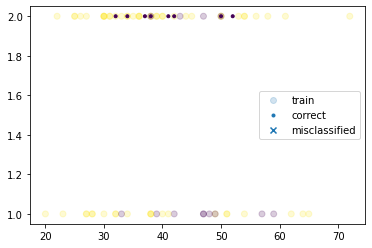

For trial 7 the accuracy is 75.0.


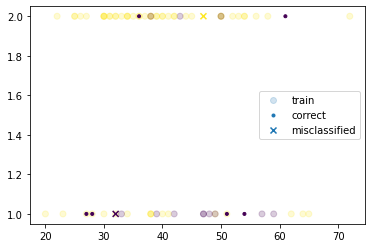

For trial 8 the accuracy is 75.0.


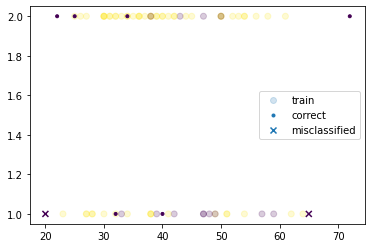

For trial 9 the accuracy is 75.0.


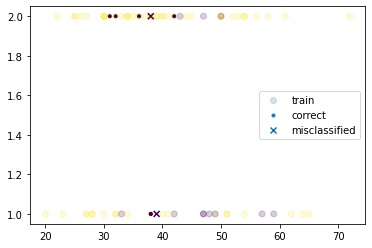

For trial 10 the accuracy is 75.0.


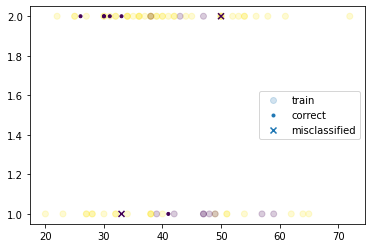

The average accuracy using the cost function cost_gini_index is: 0.7875


In [ ]:
(num_instances, num_features), num_classes = hep_feat.shape, np.max(hep_groundtruth) + 1
inds = np.random.permutation(num_instances)


hep_feat,hep_groundtruth =  hep_feat[inds], hep_groundtruth[inds]

folds = 10
hep_featurefolds = np.array_split(hep_feat, folds)
hep_truthfolds = np.array_split(hep_groundtruth, folds)
indexlist = [*range(folds)]

for costfn in costfns:
  accuracies = [] 
  for i in range(folds):
    

    hep_testfold_features = hep_featurefolds[i]
    hep_testfold_truth = hep_truthfolds[i]

    indexes = indexlist.copy()
    del indexes[i]

    hep_trainfold_features = []
    hep_trainfold_truth = [] 
    for index in indexes:
      hep_trainfold_features.append(hep_featurefolds[index])
      hep_trainfold_truth.append(hep_truthfolds[index])
    
    hep_trainfold_features = np.concatenate(hep_trainfold_features)
    hep_trainfold_truth = np.concatenate(hep_trainfold_truth)
  
    x_train, y_train = hep_trainfold_features,hep_trainfold_truth
    x_test, y_test = hep_testfold_features, hep_testfold_truth

  


    tree = DecisionTree(max_depth=3,cost_fn=costfn)
    probs_test = tree.fit(x_train, y_train).predict(x_test)

    y_pred = np.argmax(probs_test,1)


    accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
    accuracies.append(accuracy)
    print("For trial", i +1  ,f'the accuracy is {accuracy*100:.1f}.')

    #visualization
    correct = y_test == y_pred
    incorrect = np.logical_not(correct)
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
    plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
    plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_pred[incorrect], label='misclassified')
    plt.legend()
    plt.show()
  avg_accuracy = sum(accuracies)/len(accuracies)
  print("The average accuracy using the cost function",costfn.__name__ , "is:", avg_accuracy)

## Diabetes

###Simple execution with no cross validation

accuracy is 62.4.


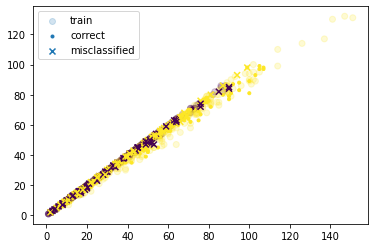

[[118   0]
 [ 56 101]]
275


In [ ]:
(num_instances, num_features), num_classes = dia_feat.shape, np.max(dia_groundtruth) + 1
inds = np.random.permutation(num_instances)
x, y = dia_feat.astype(float), dia_groundtruth

#train-test split (850 train, 351 test)
x_train, y_train = x[inds[:800]], y[inds[:800]]
x_test, y_test = x[inds[800:]], y[inds[800:]]

tree = DecisionTree(max_depth=20)
probs_test = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(probs_test,1)
accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
print(f'accuracy is {accuracy*100:.1f}.')

#visualization
correct = y_test == y_pred
incorrect = np.logical_not(correct)
plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_pred[incorrect], label='misclassified')
plt.legend()
plt.show()

#Confusion Matrix
y_pred_CV = y_pred
y_test_CV = y_test

tp, tn, fp, fn = 0, 0, 0, 0
for i in range(len(y_pred_CV)):
  if(y_pred_CV[i] == 1 and y_test_CV[i] == 1):
    tp += 1
  elif(y_pred_CV[i] == 0 and y_test_CV[i] == 0):
    tn += 1
  elif(y_pred_CV[i] == 0 and y_test_CV[i] == 1):
    fp += 1
  elif(y_pred_CV[i] == 1 and y_test_CV[i] == 2):
    fn += 1
  else:
    pass

confusion_matrix = np.array([
                             [tp, fn],
                             [fp, tn]
                            ])
print(confusion_matrix)
print(np.sum(confusion_matrix))

In [ ]:

(num_instances, num_features), num_classes = dia_feat.shape, np.max(dia_groundtruth) + 1
combolist = [*range(num_features)]
combolist = list(itertools.combinations(combolist, 2))

inds = np.random.permutation(num_instances)
print(diafeatures)
#print(num_instances)
for combo in combolist:
  f1, f2 = combo
  x, y = dia_feat.astype(float)[:,[f1,f2]], dia_groundtruth

  #train-test split
  x_train, y_train = x[inds[:800]], y[inds[:800]]
  x_test, y_test = x[inds[800:]], y[inds[800:]]

  x0v = np.linspace(np.min(x[:,0]), np.max(x[:,0]), 200)
  x1v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
  x0,x1 = np.meshgrid(x0v, x1v)
  x_all = np.vstack((x0.ravel(),x1.ravel())).T


  model = DecisionTree(max_depth=9)
  y_train_prob = np.zeros((y_train.shape[0], num_classes))
  y_train_prob[np.arange(y_train.shape[0]), y_train] = 1
  y_prob_all = model.fit(x_train, y_train).predict(x_all)
 
  plt.scatter(x_train[:,0], x_train[:,1], c=y_train_prob[:, 0], marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all[:, 0], marker='.', alpha=.01)
  plt.ylabel(diafeatures[f2])
  plt.xlabel(diafeatures[f1])
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

###Testing Depth

In [ ]:
(num_instances, num_features), num_classes = dia_feat.shape, np.max(dia_groundtruth) + 1
inds = np.random.permutation(num_instances)


dia_feat,dia_groundtruth =  dia_feat[inds], dia_groundtruth[inds]

folds = 10
dia_featurefolds = np.array_split(dia_feat, folds)
dia_truthfolds = np.array_split(dia_groundtruth, folds)
indexlist = [*range(folds)]
results = []
for depth in range(1,21):
  accuracies = [] 
  for i in range(folds):
    

    dia_testfold_features = dia_featurefolds[i]
    dia_testfold_truth = dia_truthfolds[i]

    indexes = indexlist.copy()
    del indexes[i]

    dia_trainfold_features = []
    dia_trainfold_truth = [] 
    for index in indexes:
      dia_trainfold_features.append(dia_featurefolds[index])
      dia_trainfold_truth.append(dia_truthfolds[index])
    
    dia_trainfold_features = np.concatenate(dia_trainfold_features)
    dia_trainfold_truth = np.concatenate(dia_trainfold_truth)
  
    x_train, y_train = dia_trainfold_features,dia_trainfold_truth
    x_test, y_test = dia_testfold_features, dia_testfold_truth

  


    tree = DecisionTree(max_depth=depth)
    probs_test = tree.fit(x_train, y_train).predict(x_test)

    y_pred = np.argmax(probs_test,1)


    accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
    accuracies.append(accuracy)
    print("For trial", i +1  ,f'the accuracy is {accuracy*100:.1f}.')

    #visualization
    correct = y_test == y_pred
    incorrect = np.logical_not(correct)
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
    plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
    plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_pred[incorrect], label='misclassified')
    plt.legend()
    plt.show()

  avg_accuracy = sum(accuracies)/len(accuracies)
  
  results.append(avg_accuracy)

  print("The average accuracy using the depth",depth , "is:", avg_accuracy)

d = 0
for result in results:
  d += 1
  print("At depth", d ,", the average accuracy is:", result)

Output hidden; open in https://colab.research.google.com to view.

###Testing cost functions

For trial 1 the accuracy is 67.2.


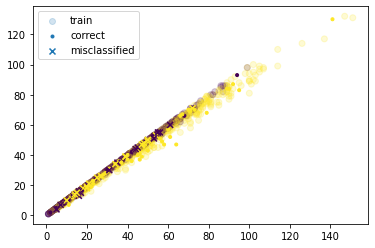

For trial 2 the accuracy is 70.4.


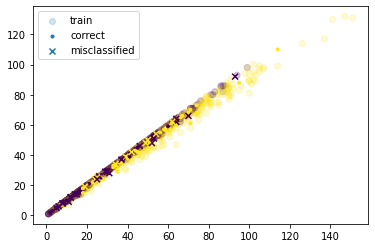

For trial 3 the accuracy is 67.8.


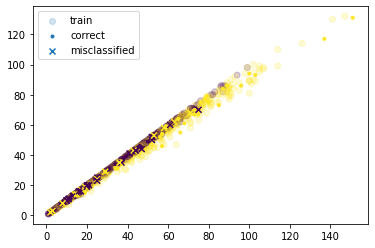

For trial 4 the accuracy is 60.9.


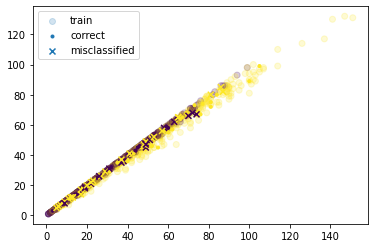

For trial 5 the accuracy is 61.7.


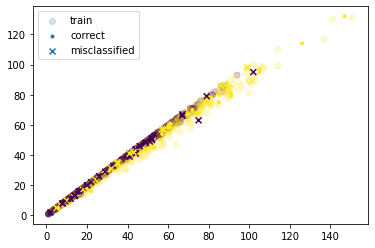

For trial 6 the accuracy is 67.0.


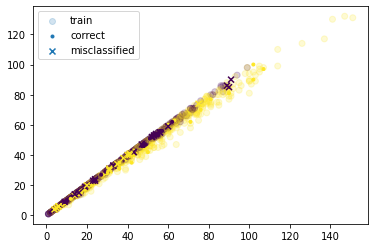

For trial 7 the accuracy is 60.9.


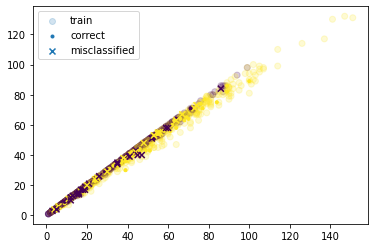

For trial 8 the accuracy is 56.5.


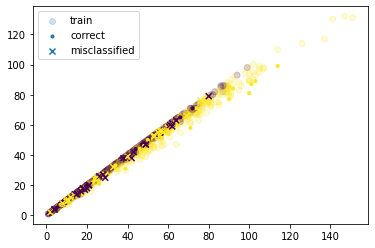

For trial 9 the accuracy is 70.4.


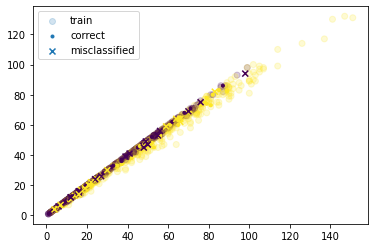

For trial 10 the accuracy is 59.1.


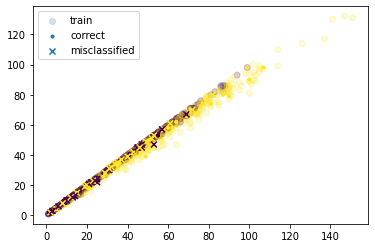

The average accuracy using the cost function cost_misclassification is: 0.642023988005997
For trial 1 the accuracy is 66.4.


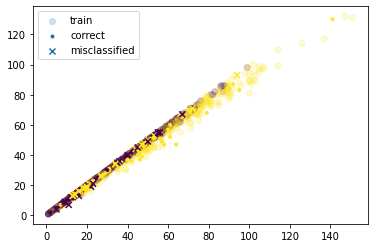

For trial 2 the accuracy is 67.8.


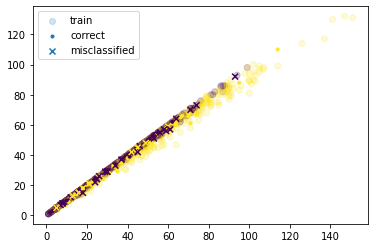

For trial 3 the accuracy is 67.8.


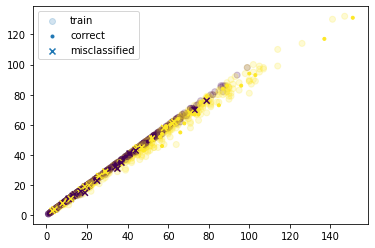

For trial 4 the accuracy is 68.7.


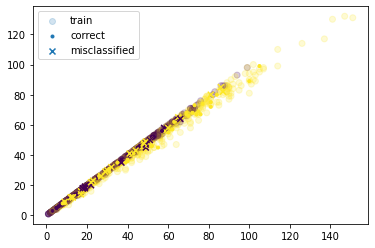

For trial 5 the accuracy is 64.3.


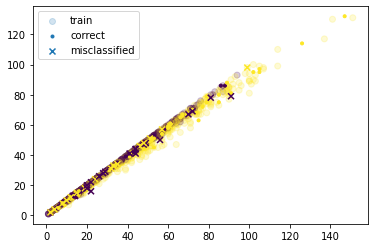

For trial 6 the accuracy is 53.0.


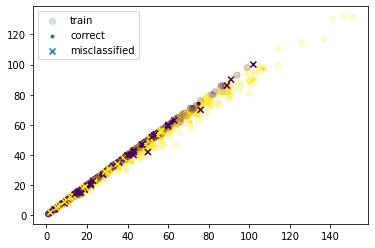

For trial 7 the accuracy is 63.5.


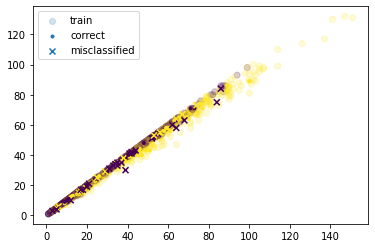

For trial 8 the accuracy is 62.6.


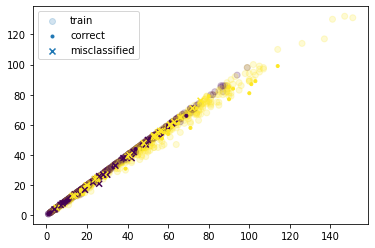

For trial 9 the accuracy is 61.7.


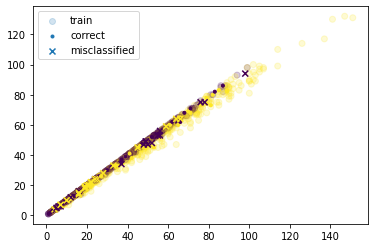

For trial 10 the accuracy is 68.7.


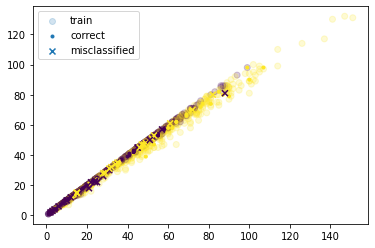

The average accuracy using the cost function cost_entropy is: 0.644640179910045
For trial 1 the accuracy is 61.2.


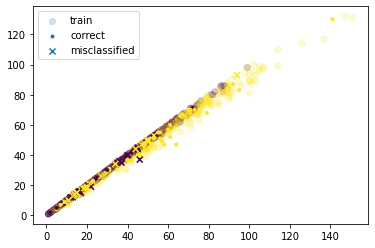

For trial 2 the accuracy is 65.2.


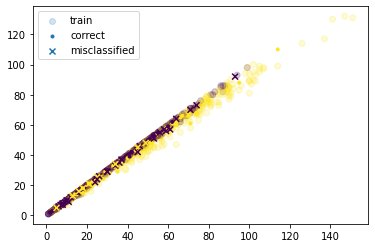

For trial 3 the accuracy is 61.7.


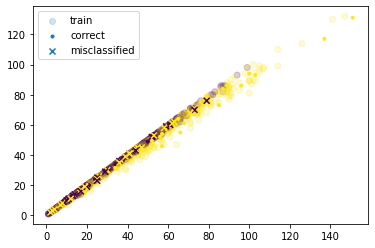

For trial 4 the accuracy is 71.3.


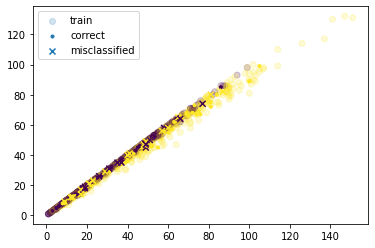

For trial 5 the accuracy is 65.2.


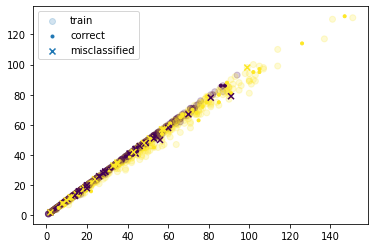

For trial 6 the accuracy is 56.5.


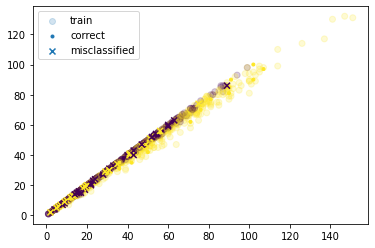

For trial 7 the accuracy is 58.3.


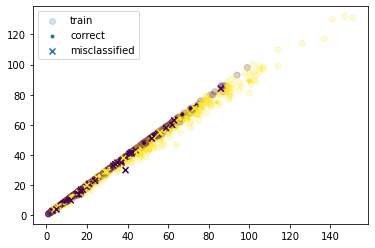

For trial 8 the accuracy is 62.6.


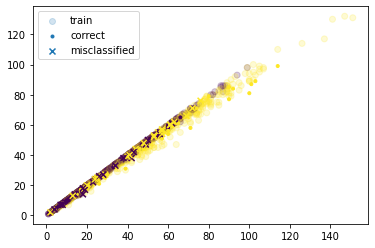

For trial 9 the accuracy is 63.5.


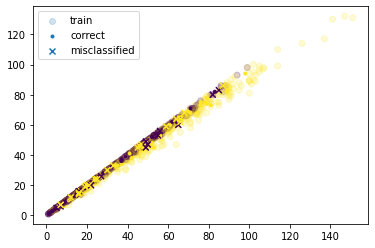

For trial 10 the accuracy is 70.4.


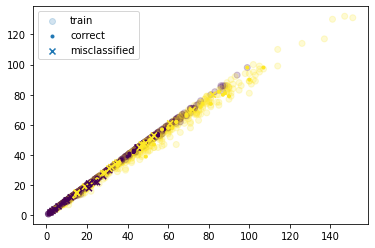

The average accuracy using the cost function cost_gini_index is: 0.6359895052473763


In [ ]:
(num_instances, num_features), num_classes = dia_feat.shape, np.max(dia_groundtruth) + 1
inds = np.random.permutation(num_instances)


dia_feat,dia_groundtruth =  dia_feat[inds], dia_groundtruth[inds]

folds = 10
dia_featurefolds = np.array_split(dia_feat, folds)
dia_truthfolds = np.array_split(dia_groundtruth, folds)
indexlist = [*range(folds)]
for costfn in costfns:
  accuracies = [] 
  for i in range(folds):
    

    dia_testfold_features = dia_featurefolds[i]
    dia_testfold_truth = dia_truthfolds[i]

    indexes = indexlist.copy()
    del indexes[i]

    dia_trainfold_features = []
    dia_trainfold_truth = [] 
    for index in indexes:
      dia_trainfold_features.append(dia_featurefolds[index])
      dia_trainfold_truth.append(dia_truthfolds[index])
    
    dia_trainfold_features = np.concatenate(dia_trainfold_features)
    dia_trainfold_truth = np.concatenate(dia_trainfold_truth)
  
    x_train, y_train = dia_trainfold_features,dia_trainfold_truth
    x_test, y_test = dia_testfold_features, dia_testfold_truth

  


    tree = DecisionTree(max_depth=20,cost_fn=costfn)
    probs_test = tree.fit(x_train, y_train).predict(x_test)

    y_pred = np.argmax(probs_test,1)


    accuracy = np.sum(y_pred == y_test) / y_test.shape[0]
    accuracies.append(accuracy)
    print("For trial", i +1  ,f'the accuracy is {accuracy*100:.1f}.')

    #visualization
    correct = y_test == y_pred
    incorrect = np.logical_not(correct)
    plt.scatter(x_train[:,0], x_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
    plt.scatter(x_test[correct,0], x_test[correct,1], marker='.', c=y_pred[correct], label='correct')
    plt.scatter(x_test[incorrect,0], x_test[incorrect,1], marker='x', c=y_pred[incorrect], label='misclassified')
    plt.legend()
    plt.show()

  avg_accuracy = sum(accuracies)/len(accuracies)
  print("The average accuracy using the cost function",costfn.__name__ , "is:", avg_accuracy)